In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="SzTQzA4EpeXuxZ4ByHpK")
project = rf.workspace("ewuricedataset").project("rice-panicle-final")
version = project.version(2)
dataset = version.download("yolov8")
                
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 87.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 89.8 MB/s eta 0:00:00:00:01
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.3.0
    Uninstalling pillow-10.3.0:
      Successfully uninstalled pillow-10.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.10.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.1 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Rice-Panicle-Final-2 in yolov8:: 100%|██████████| 11414/11414 [00:03<00:00, 3784.94it/s]


In [2]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.189 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6407.4/8062.4 GB disk)


In [3]:
!sed -i '$d' {dataset.location}/data.yaml   # Delete the last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the second-to-last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the third-to-last line

!echo 'test: ../test/images' >> {dataset.location}/data.yaml
!echo 'train: ../train/images' >> {dataset.location}/data.yaml
!echo 'val: ../valid/images' >> {dataset.location}/data.yaml

In [4]:
!yolo task=detect mode=train model=yolov8s.pt data=/kaggle/working/Rice-Panicle-Final-2/data.yaml epochs=50 imgsz=640 plots=True


Ultralytics 8.3.189 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Rice-Panicle-Final-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0

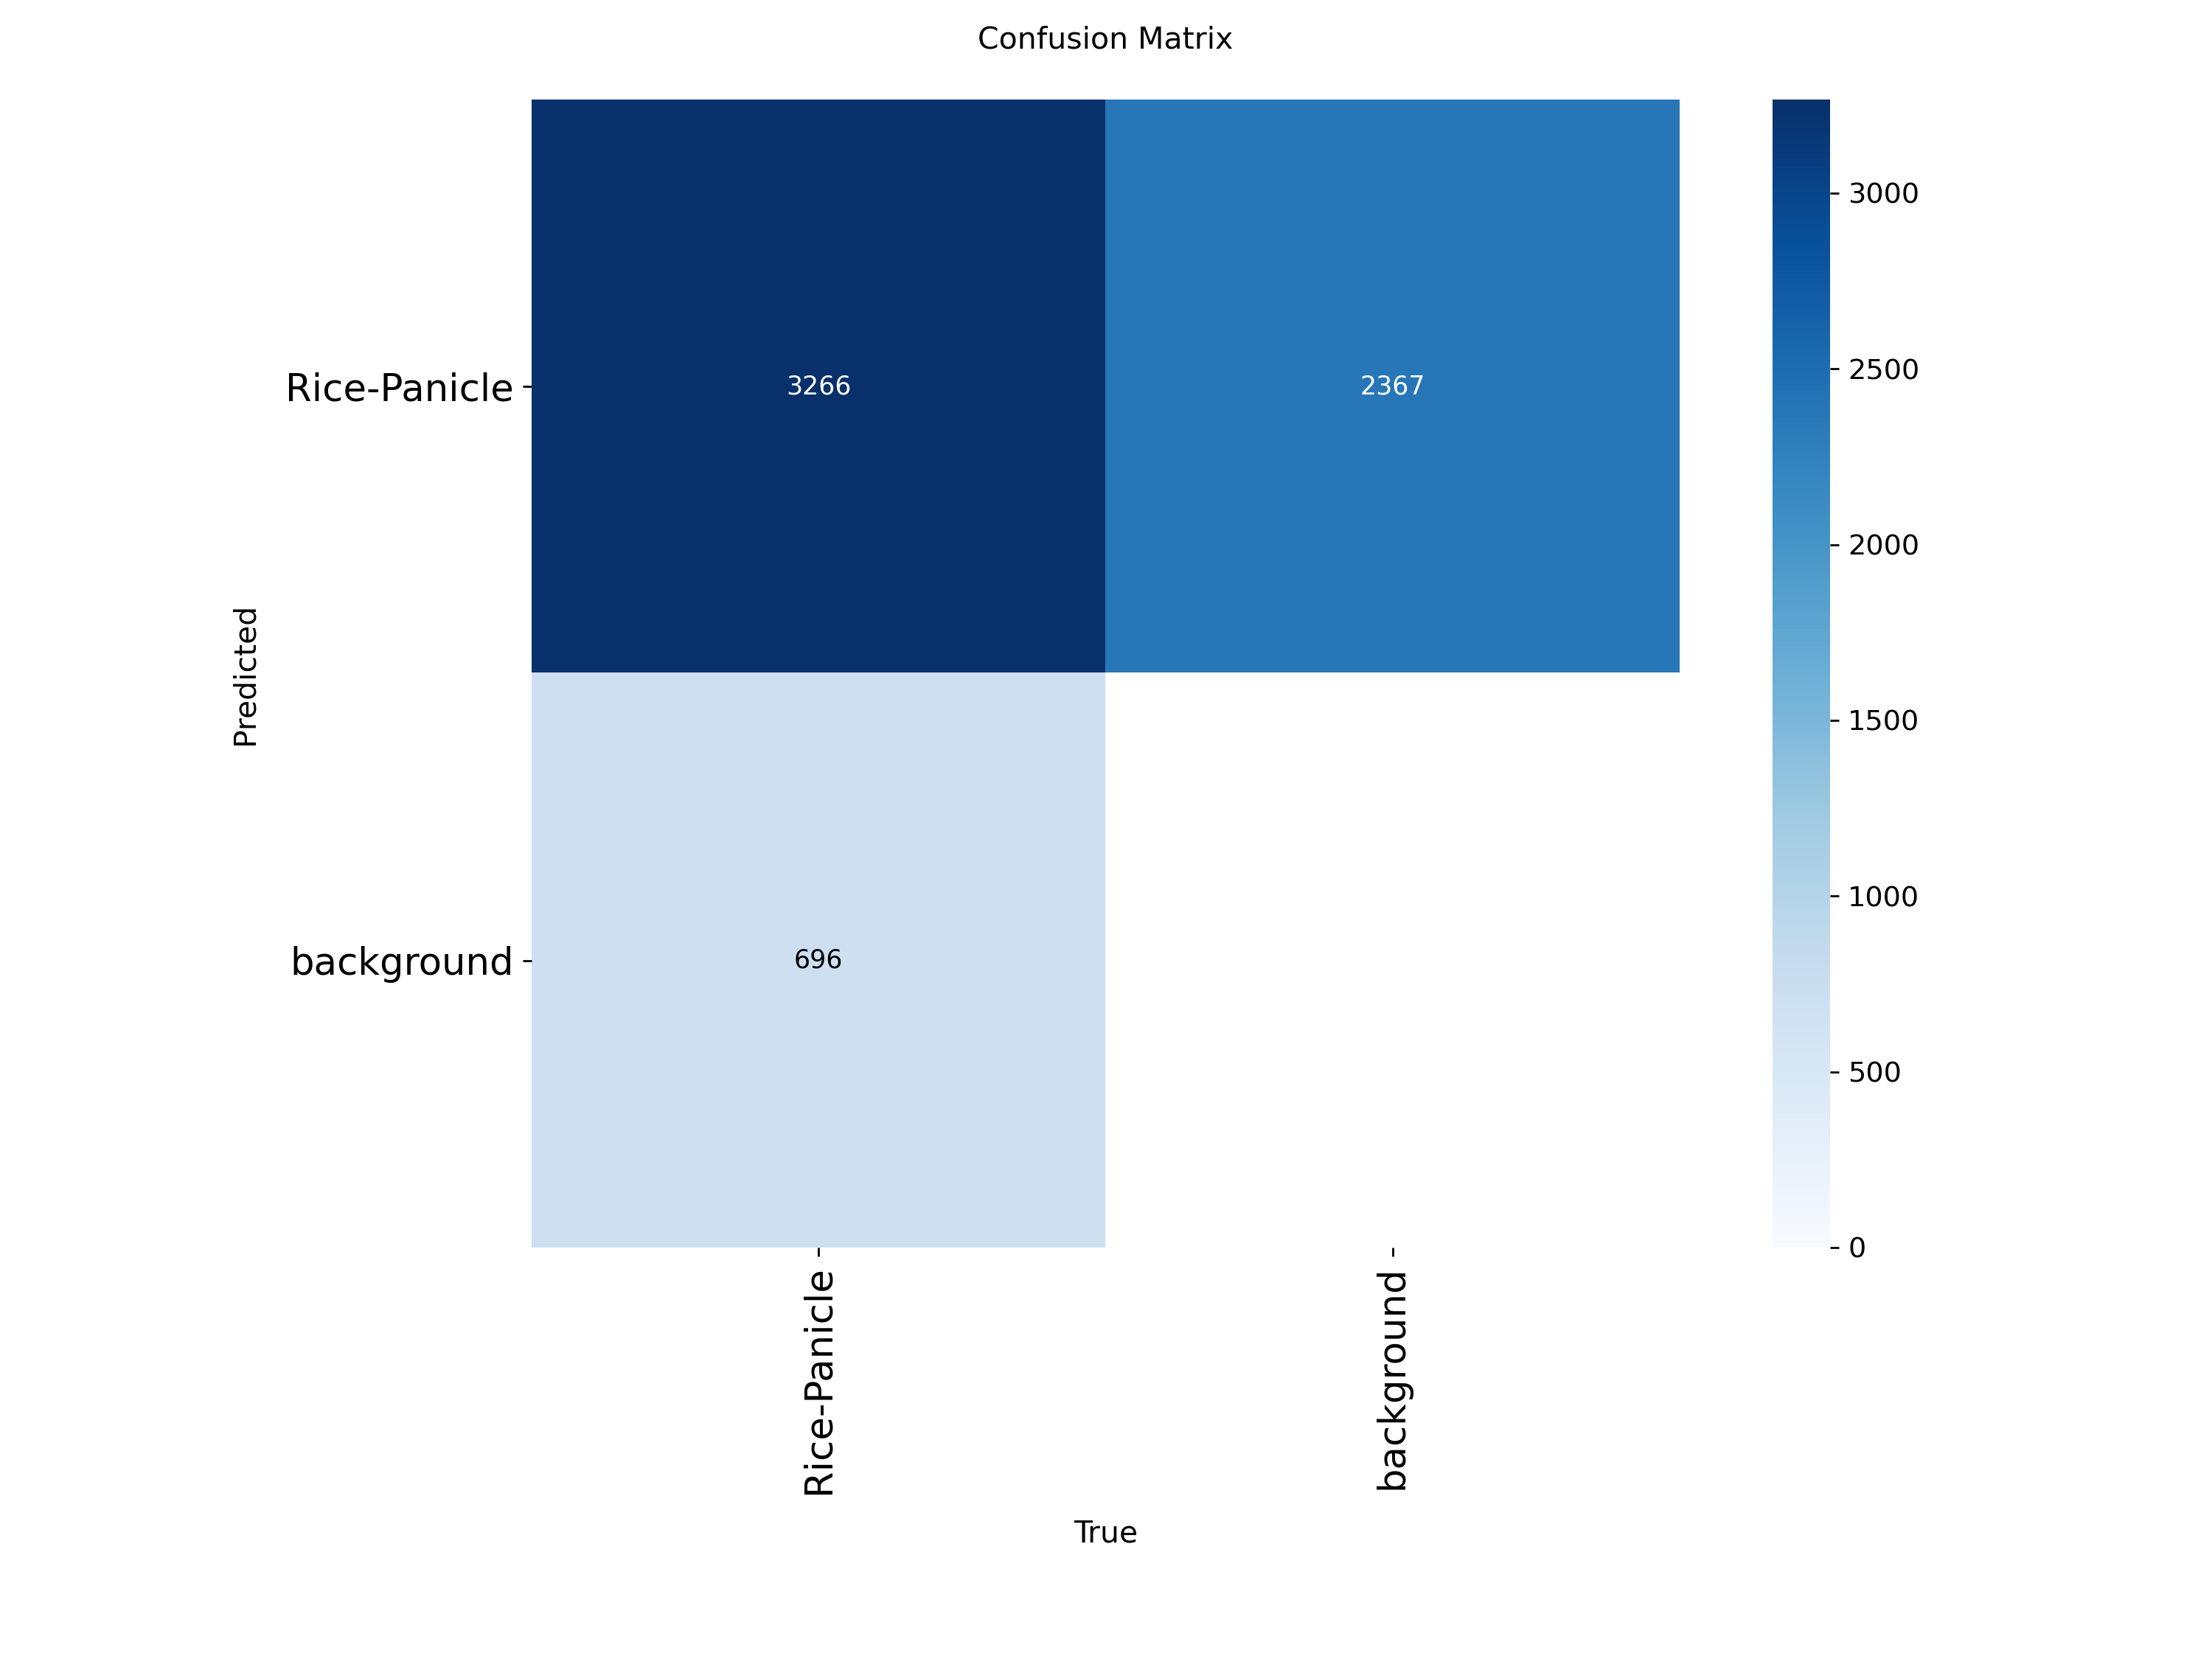

In [29]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/kaggle/working/runs/detect/train/confusion_matrix.png', width=600)

In [31]:
import pandas as pd

# Path to results.csv
results_path = "/kaggle/working/runs/detect/train/results.csv"

# Load results into a DataFrame
results = pd.read_csv(results_path)

# Display the metrics for the last epoch
print("Metrics from the final epoch:")
print(results.iloc[-1])  # Shows precision, recall, F1-score, mAP, etc.



Metrics from the final epoch:
epoch                     50.00000
time                    4521.07000
train/box_loss             1.10061
train/cls_loss             0.82502
train/dfl_loss             1.00155
metrics/precision(B)       0.68139
metrics/recall(B)          0.72792
metrics/mAP50(B)           0.75867
metrics/mAP50-95(B)        0.50505
val/box_loss               1.24095
val/cls_loss               0.97621
val/dfl_loss               1.06654
lr/pg0                     0.00006
lr/pg1                     0.00006
lr/pg2                     0.00006
Name: 49, dtype: float64


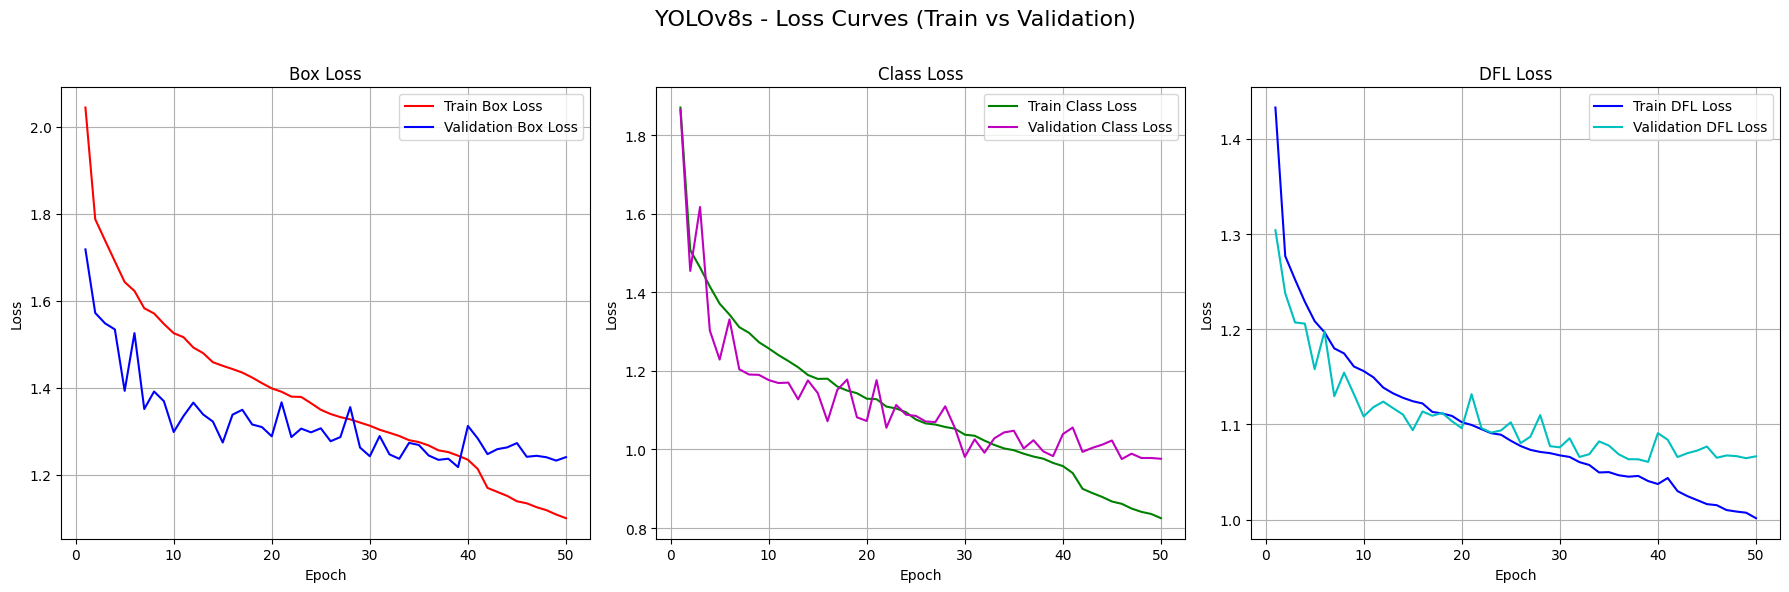

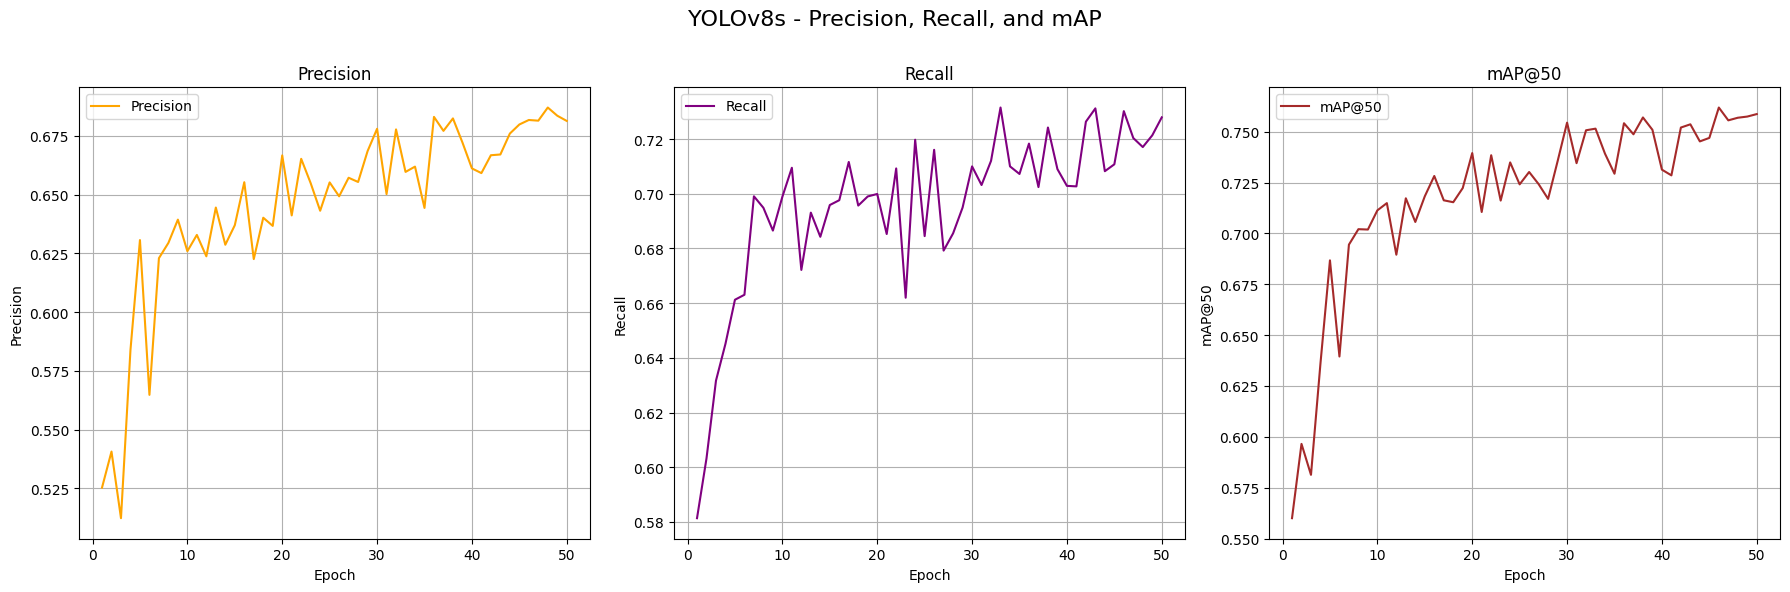

In [32]:
import matplotlib.pyplot as plt

# Assuming 'model_name' holds the name of your model
model_name = "YOLOv8s"

# Plot 1: Mixed Loss Curves (Training vs Validation)
fig1, axes1 = plt.subplots(1, 3, figsize=(18, 6))
fig1.suptitle(f"{model_name} - Loss Curves (Train vs Validation)", fontsize=16)

# Mixed Box Loss (Train vs Validation)
axes1[0].plot(results['epoch'], results['train/box_loss'], label='Train Box Loss', color='r')
axes1[0].plot(results['epoch'], results['val/box_loss'], label='Validation Box Loss', color='b')
axes1[0].set_title("Box Loss")
axes1[0].set_xlabel("Epoch")
axes1[0].set_ylabel("Loss")
axes1[0].legend()
axes1[0].grid(True)

# Mixed Class Loss (Train vs Validation)
axes1[1].plot(results['epoch'], results['train/cls_loss'], label='Train Class Loss', color='g')
axes1[1].plot(results['epoch'], results['val/cls_loss'], label='Validation Class Loss', color='m')
axes1[1].set_title("Class Loss")
axes1[1].set_xlabel("Epoch")
axes1[1].set_ylabel("Loss")
axes1[1].legend()
axes1[1].grid(True)

# Mixed DFL Loss (Train vs Validation)
axes1[2].plot(results['epoch'], results['train/dfl_loss'], label='Train DFL Loss', color='b')
axes1[2].plot(results['epoch'], results['val/dfl_loss'], label='Validation DFL Loss', color='c')
axes1[2].set_title("DFL Loss")
axes1[2].set_xlabel("Epoch")
axes1[2].set_ylabel("Loss")
axes1[2].legend()
axes1[2].grid(True)

# Adjust layout for better spacing
fig1.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# Plot 2: Precision, Recall, and mAP Curves
fig2, axes2 = plt.subplots(1, 3, figsize=(18, 6))
fig2.suptitle(f"{model_name} - Precision, Recall, and mAP", fontsize=16)

# Precision, Recall, and mAP
axes2[0].plot(results['epoch'], results['metrics/precision(B)'], label='Precision', color='orange')
axes2[0].set_title("Precision")
axes2[0].set_xlabel("Epoch")
axes2[0].set_ylabel("Precision")
axes2[0].legend()
axes2[0].grid(True)

axes2[1].plot(results['epoch'], results['metrics/recall(B)'], label='Recall', color='purple')
axes2[1].set_title("Recall")
axes2[1].set_xlabel("Epoch")
axes2[1].set_ylabel("Recall")
axes2[1].legend()
axes2[1].grid(True)

axes2[2].plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@50', color='brown')
axes2[2].set_title("mAP@50")
axes2[2].set_xlabel("Epoch")
axes2[2].set_ylabel("mAP@50")
axes2[2].legend()
axes2[2].grid(True)

# Adjust layout for better spacing
fig2.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


In [6]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/working/Rice-Panicle-Final-2/test/images save=True

Ultralytics 8.3.189 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/220 /kaggle/working/Rice-Panicle-Final-2/test/images/004_split_3_0_jpg.rf.7aa9d207ca573dd43cbc13bd4568d393.jpg: 384x640 19 Rice-Panicles, 40.9ms
image 2/220 /kaggle/working/Rice-Panicle-Final-2/test/images/006_split_0_2_jpg.rf.dd9d1202dfedec07caa174adbf46a22f.jpg: 384x640 25 Rice-Panicles, 10.7ms
image 3/220 /kaggle/working/Rice-Panicle-Final-2/test/images/008_split_0_1_jpg.rf.58bce36d487d2d5ab729c49317706842.jpg: 384x640 28 Rice-Panicles, 10.6ms
image 4/220 /kaggle/working/Rice-Panicle-Final-2/test/images/011_split_2_1_jpg.rf.5b56a9eb6de8486c24b4c0dc27828638.jpg: 384x640 25 Rice-Panicles, 10.6ms
image 5/220 /kaggle/working/Rice-Panicle-Final-2/test/images/012_split_2_1_jpg.rf.caf30ab20f9d70b2631230ca9137062b.jpg: 384x640 28 Rice-Panicles, 10.6ms
image 6/220 /kaggle/working/Rice-Panicle-Final-2/test/images/013_split_1_3_

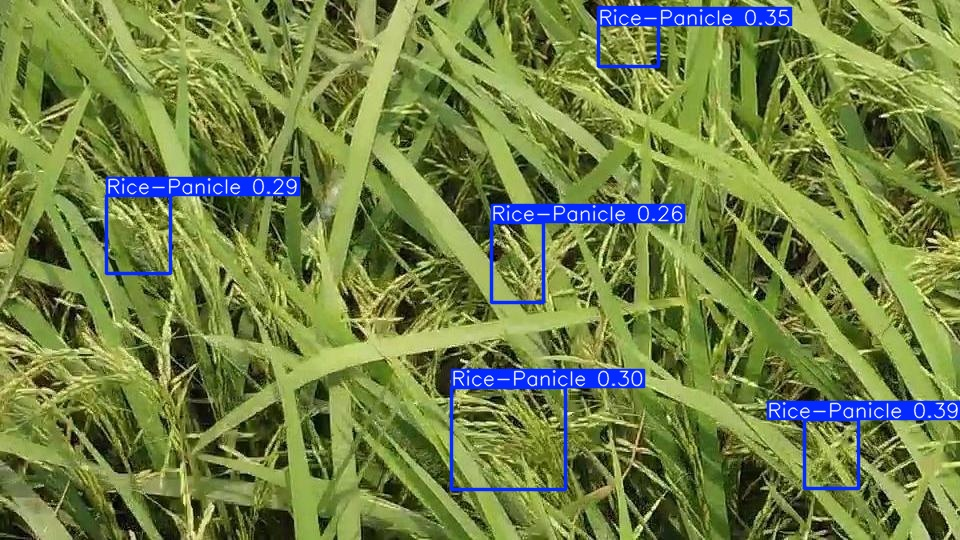

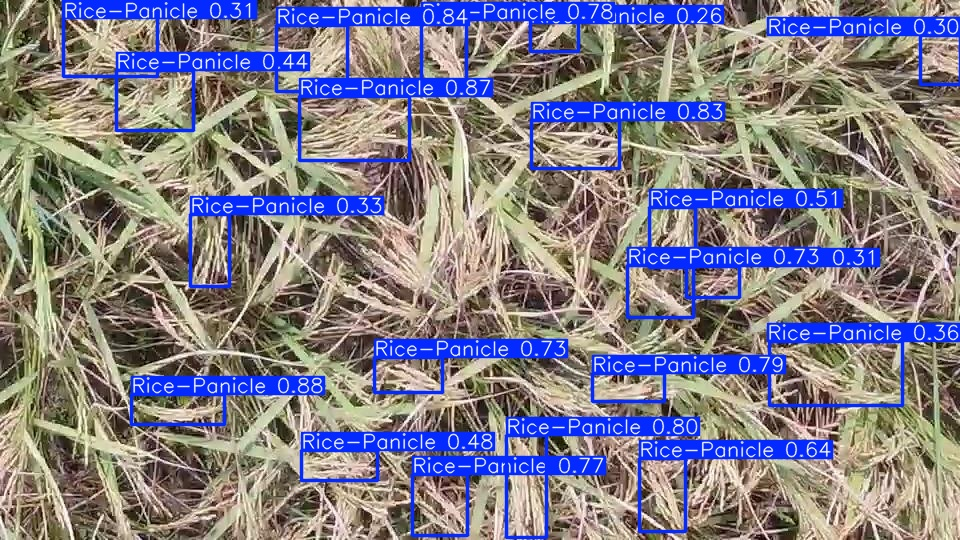

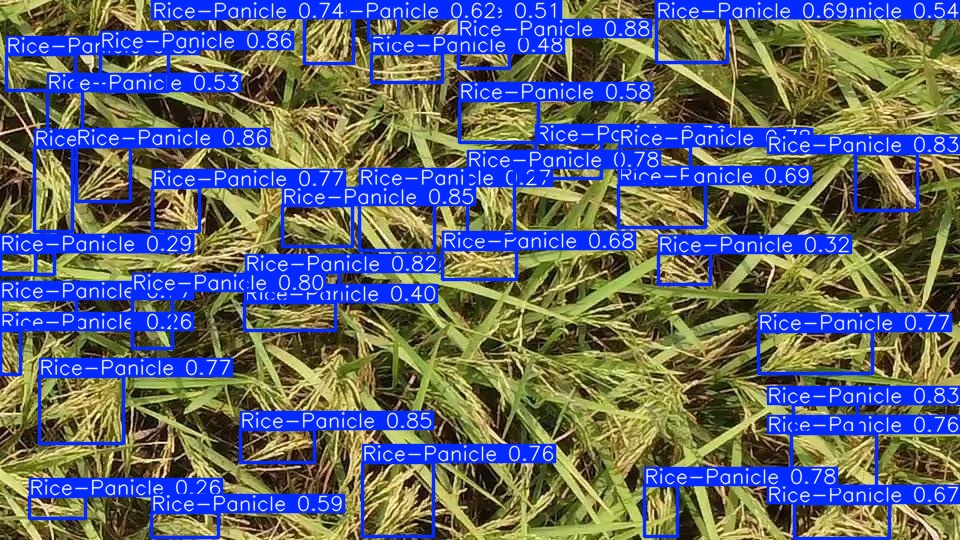

In [7]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/kaggle/working/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
	display(IPyImage(filename=img, width=600))
	print("\n")

In [8]:
!git clone https://github.com/rigvedrs/YOLO-V8-CAM.git

Cloning into 'YOLO-V8-CAM'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 164 (delta 37), reused 21 (delta 11), pack-reused 99 (from 2)
Receiving objects: 100% (164/164), 52.67 MiB | 35.02 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [10]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch    
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io

In [11]:
!ls

Rice-Panicle-Final-2  YOLO-V8-CAM  runs  yolo11n.pt  yolov8s.pt


In [12]:
%cd /kaggle/working/YOLO-V8-CAM

/kaggle/working/YOLO-V8-CAM


In [13]:
!ls

LICENSE.txt  YOLO_v11_EigenCAM.ipynb  images  test
README.md    YOLO_v8n_EigenCAM.ipynb  models  yolo_cam


In [14]:
!pip install ttach

In [16]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [18]:
img = cv2.imread('/kaggle/working/Rice-Panicle-Final-2/test/images/084_split_2_0_jpg.rf.9f326d055da577eb718958c4fd1e940d.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [20]:
import ultralytics
from ultralytics import YOLO
model = YOLO('/kaggle/working/yolov8s.pt') 
model.cpu()

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [21]:
target_layers =[model.model.model[-2]]

In [22]:
cam = EigenCAM(model, target_layers,task='od')


0: 640x640 (no detections), 385.0ms
Speed: 5.4ms preprocess, 385.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


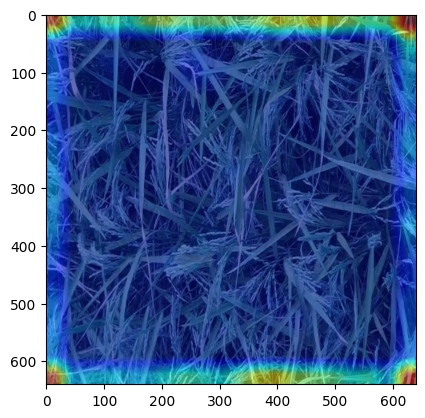

In [23]:
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


0: 640x640 (no detections), 369.8ms
Speed: 2.4ms preprocess, 369.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


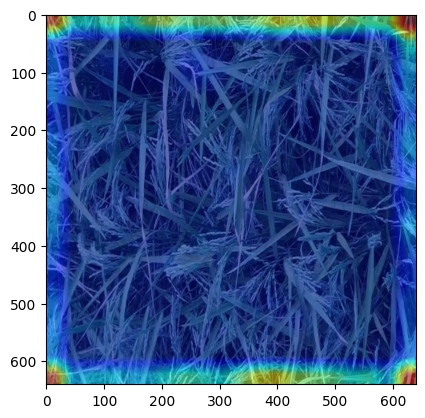

In [24]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

In [25]:
target_layers =[model.model.model[-2], model.model.model[-3], model.model.model[-4]]


0: 640x640 (no detections), 373.1ms
Speed: 3.1ms preprocess, 373.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


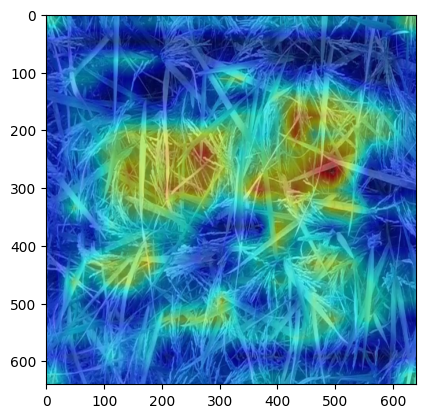

In [26]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

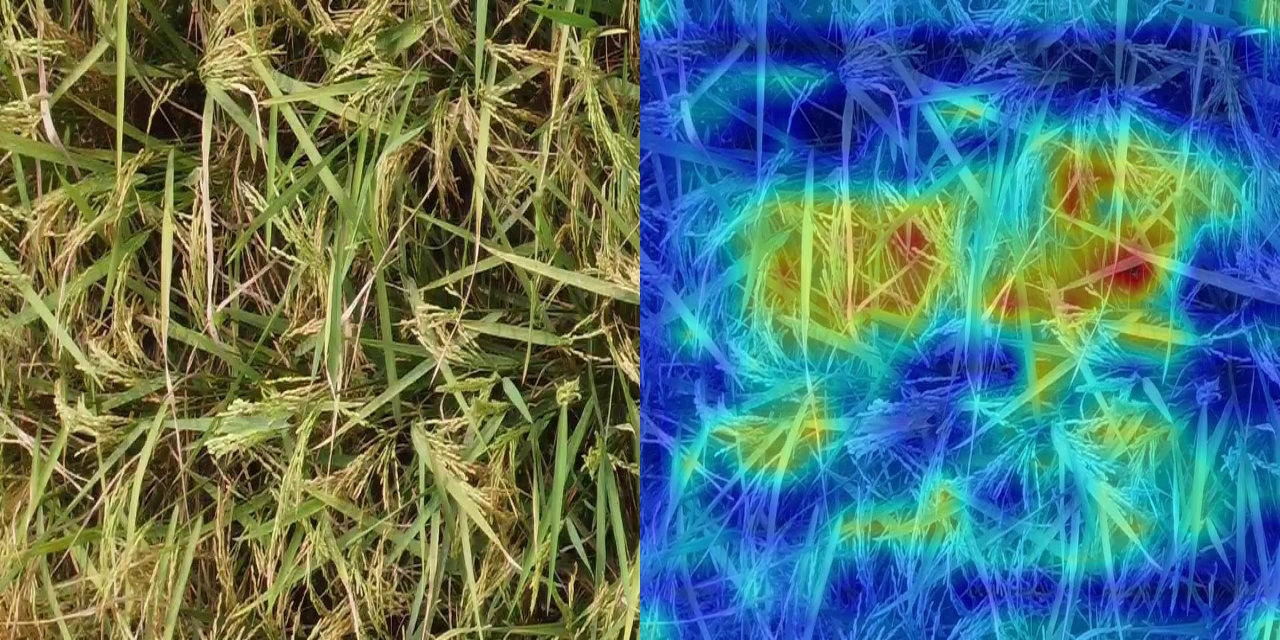

In [27]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))